In [96]:
import torch
import numpy as np
import matplotlib.pyplot as plt

In [97]:
weight = 0.7
bias = 0.3

start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)

y = weight * X + bias 

In [98]:
X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [99]:
y.shape

torch.Size([50, 1])

In [100]:
train_split = int(0.8 * len(X))

X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

X_train.shape, y_train.shape, X_test.shape, y_test.shape

(torch.Size([40, 1]),
 torch.Size([40, 1]),
 torch.Size([10, 1]),
 torch.Size([10, 1]))

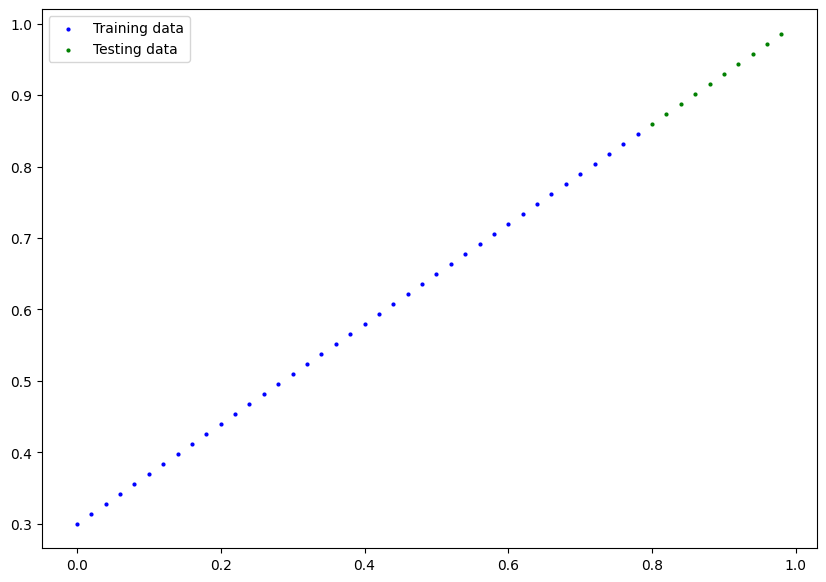

In [101]:
def plot_predictions(train_data=X_train, 
                     train_labels=y_train, 
                     test_data=X_test, 
                     test_labels=y_test, 
                     predictions=None):
    plt.figure(figsize=(10,7))
    
    plt.scatter(train_data, train_labels, c='b', s=4, label="Training data")
    plt.scatter(test_data, test_labels, c='g',s=4, label="Testing data")
    
    if predictions is not None:
        plt.scatter(test_data, predictions, c='r',s=4, label="Predictions")
    plt.legend()

plot_predictions()

In [102]:
import torch.nn as nn
class LinearRegressionModule(nn.Module):
    def __init__(self):
        super().__init__()
        self.weight = nn.Parameter(torch.randn(1,requires_grad=True, dtype=torch.float))
        self.bias = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
        
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.weight * x + self.bias

In [103]:
torch.manual_seed(42)
model_0 = LinearRegressionModule()
model_0

LinearRegressionModule()

In [104]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [105]:
model_0.state_dict()

OrderedDict([('wight', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [106]:
with torch.inference_mode():
    y_preds = model_0(X_test)

y_preds, y_test


(tensor([[0.3982],
         [0.4049],
         [0.4116],
         [0.4184],
         [0.4251],
         [0.4318],
         [0.4386],
         [0.4453],
         [0.4520],
         [0.4588]]),
 tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]))

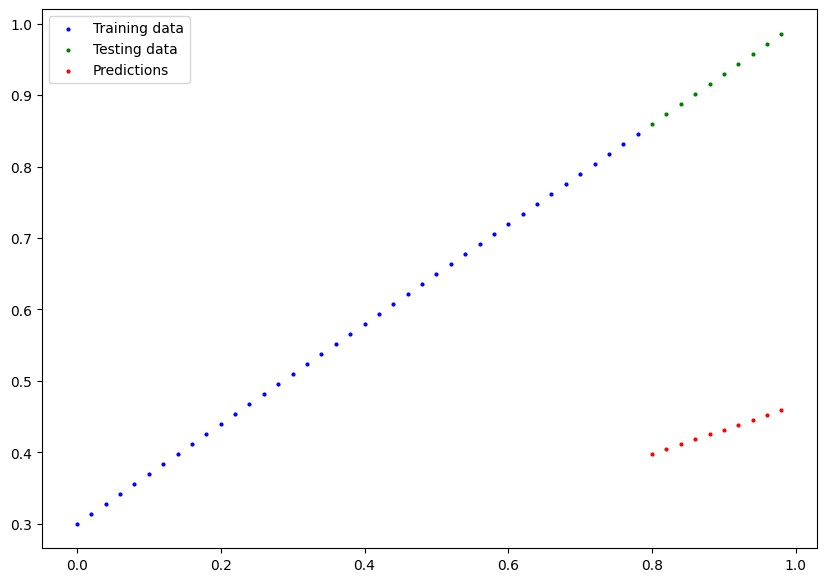

In [107]:
plot_predictions(predictions=y_preds)

In [108]:
loss_fn = nn.L1Loss()
optim = torch.optim.SGD(model_0.parameters(), lr=0.002)

In [109]:
epochs = 1000
y_hat = None

lost_list = []
lost_test_list = []
epoch_list = []


for epoch in range(epochs):
    model_0.train()
    # model_0.parameters()
    y_hat = model_0(X_train)
    loss = loss_fn(y_hat, y_train)
    optim.zero_grad()
    loss.backward()
    optim.step()
    model_0.eval
    
    with torch.inference_mode():
        y_preds = model_0(X_test)
        loss_test = loss_fn(y_preds, y_test)
        

    if epoch % 10 == 0:
        print(f"epoch {epoch} loss {loss.item():.4f}")
        print(f"epoch {epoch} loss test {loss_test.item():.4f}")
        
        epoch_list.append(epoch)
        lost_list.append(loss.item())
        lost_test_list.append(loss_test.item())

    
    
model_0.state_dict()

epoch 0 loss 0.3129
epoch 0 loss test 0.4918
epoch 10 loss 0.2898
epoch 10 loss test 0.4649
epoch 20 loss 0.2668
epoch 20 loss test 0.4380
epoch 30 loss 0.2438
epoch 30 loss test 0.4110
epoch 40 loss 0.2207
epoch 40 loss test 0.3841
epoch 50 loss 0.1977
epoch 50 loss test 0.3571
epoch 60 loss 0.1746
epoch 60 loss test 0.3302
epoch 70 loss 0.1516
epoch 70 loss test 0.3032
epoch 80 loss 0.1285
epoch 80 loss test 0.2763
epoch 90 loss 0.1065
epoch 90 loss test 0.2501
epoch 100 loss 0.0897
epoch 100 loss test 0.2268
epoch 110 loss 0.0773
epoch 110 loss test 0.2066
epoch 120 loss 0.0683
epoch 120 loss test 0.1891
epoch 130 loss 0.0617
epoch 130 loss test 0.1740
epoch 140 loss 0.0569
epoch 140 loss test 0.1612
epoch 150 loss 0.0536
epoch 150 loss test 0.1504
epoch 160 loss 0.0510
epoch 160 loss test 0.1411
epoch 170 loss 0.0492
epoch 170 loss test 0.1333
epoch 180 loss 0.0477
epoch 180 loss test 0.1267
epoch 190 loss 0.0465
epoch 190 loss test 0.1211
epoch 200 loss 0.0455
epoch 200 loss test 

OrderedDict([('wight', tensor([0.6981])), ('bias', tensor([0.2989]))])

In [110]:
weight, bias

(0.7, 0.3)

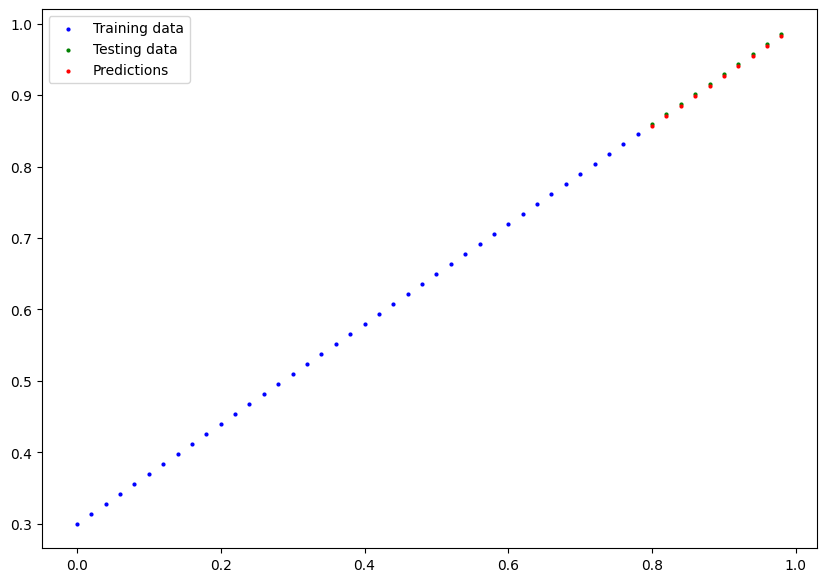

In [111]:
# y_preds = model_0(X_test)
# with torch.no_grad():

# model_0.requires_grad_(False)
with torch.inference_mode():
    y_preds = model_0(X_test)
plot_predictions(predictions=y_preds)

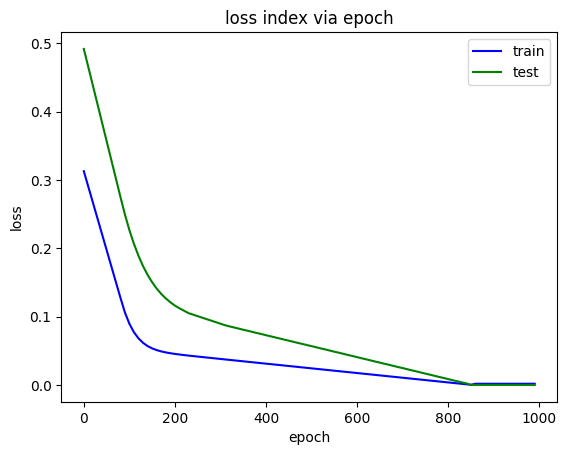

In [116]:
plt.plot(epoch_list, lost_list, label="train", c="b")
plt.plot(epoch_list, lost_test_list, label="test", c="g")
plt.title("loss index via epoch")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()

### Save / Load Modules


In [117]:
from pathlib import Path

MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

MODEL_NAME = "pytorch_workflow_¢model_0.pt"

FULL_PATH = MODEL_PATH / MODEL_NAME
# torch.save(model_0.state_dict(), FULL_PATH)

# model_copy = LinearRegressionModule()
# model_copy.load_state_dict(torch.load(FULL_PATH))

In [118]:
torch.save(model_0, FULL_PATH)

In [120]:
# model_copy = LinearRegressionModule()
model_copy = torch.load(FULL_PATH)
list(model_copy.parameters())

[Parameter containing:
 tensor([0.6981], requires_grad=True),
 Parameter containing:
 tensor([0.2989], requires_grad=True)]